<a href="https://colab.research.google.com/github/jiruneko/decision_tree/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
data, target = iris.data, iris.target
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=123, test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(max_depth=3)

In [ ]:
tree.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
!pip install pydotplus

In [ ]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data = export_graphviz(tree, filled=True, rounded=True, class_names=['Setosa', 'Versicolor', 'Virginica'], feature_names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'], out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

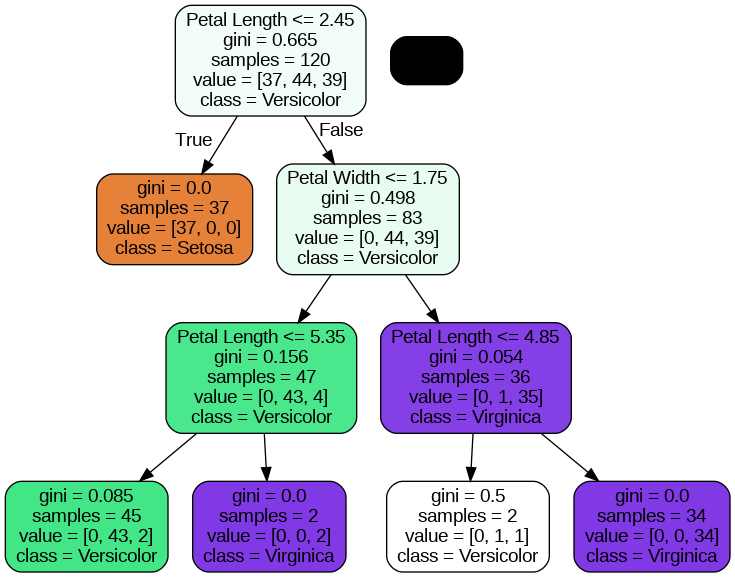

In [ ]:
from IPython.display import Image
Image('tree.png')

In [ ]:
target_pred = tree.predict(data_test)
target_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0])